In [348]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, sgd , Adam
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

In [349]:
data_tr=pd.read_csv("manipal_sah_tr.csv")
data_test=pd.read_csv("manipal_sah_test.csv")

In [350]:
data_test

,Age,Sex,Hypertension,Daibetes,WFNS grade,Radiological Vasospas1,Clinical ischemic de0icits,Outcome at Discharge
0,65,0,0,0,2,1,1,4
1,80,0,0,1,1,1,1,4
2,49,1,0,1,1,1,1,5
3,50,1,1,1,3,1,1,4
4,60,1,0,1,3,0,1,4
5,59,0,1,1,1,1,1,5
6,47,0,1,0,1,1,1,5
7,37,1,1,0,2,1,0,3
8,10,1,0,0,3,0,0,3
9,52,0,1,1,4,0,0,1


In [351]:
x_train=data_tr[data_tr.columns[0:5]]
y_train=data_tr[data_tr.columns[8]]
x_test=data_test[data_test.columns[0:5]]
y_test=data_test[data_test.columns[7]]

batch_size = 32
num_classes = 5
epochs = 25
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

y_train=y_train[:,1:]
y_test=y_test[:,1:]
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#np.std(x_train[x_train.columns[0]])




In [352]:
#Standardizing the data
df=x_train
x_train=(df-df.mean())/(df.std())
x_test=(x_test-df.mean())/(df.std())
x_test

,Age,Sex,Hypertension,Daibetes,WFNS grade
0,1.226985,-0.991267,-0.726926,-1.164034,0.204975
1,2.531802,-0.991267,-0.726926,0.857709,-1.042787
2,-0.164819,1.007204,-0.726926,0.857709,-1.042787
3,-0.077831,1.007204,1.373455,0.857709,1.452738
4,0.792047,1.007204,-0.726926,0.857709,1.452738
5,0.705059,-0.991267,1.373455,0.857709,-1.042787
6,-0.338794,-0.991267,1.373455,-1.164034,-1.042787
7,-1.208672,1.007204,1.373455,-1.164034,0.204975
8,-3.557342,1.007204,-0.726926,-1.164034,1.452738
9,0.096144,-0.991267,1.373455,0.857709,2.700500


In [353]:
#Splitting train set into train and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=7)

In [360]:
model = Sequential()
#model.add(Dense(5, activation='relu', input_shape=(5,)))
#model.add(Dense(8,activation='relu'))
model.add(Dense(num_classes, activation='softmax' , input_shape=(5,)))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(X_test, Y_test),class_weight={0:6,1:6,2:3,3:3,4:1})
y_test = model.predict(x_test, verbose=0)

#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_249 (Dense)            (None, 5)                 30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________
Train on 420 samples, validate on 207 samples
Epoch 1/25
 - 0s - loss: 4.6551 - accuracy: 0.2262 - val_loss: 1.7313 - val_accuracy: 0.2802
Epoch 2/25
 - 0s - loss: 4.6232 - accuracy: 0.2310 - val_loss: 1.7230 - val_accuracy: 0.2850
Epoch 3/25
 - 0s - loss: 4.5953 - accuracy: 0.2357 - val_loss: 1.7157 - val_accuracy: 0.2899
Epoch 4/25
 - 0s - loss: 4.5668 - accuracy: 0.2381 - val_loss: 1.7076 - val_accuracy: 0.2850
Epoch 5/25
 - 0s - loss: 4.5403 - accuracy: 0.2381 - val_loss: 1.7010 - val_accuracy: 0.2850
Epoch 6/25
 - 0s - loss: 4.5159 - accuracy: 0.2429 - val_loss: 1.6946 - val_accuracy: 0.2754
Epoch 7/25
 - 0s - loss: 4.4919 - accuracy: 0.2

In [361]:
#Reverse one hot encoding
result=np.argmax(y_test,axis=1)+1
result

array([4, 5, 5, 1, 5, 2, 2, 2, 3, 4, 2, 4, 5, 4, 3, 3, 3, 3, 5, 5, 2, 5,
       2, 5, 5, 3, 2, 4, 4, 5, 5, 3, 3, 3, 3, 4, 5, 5, 1, 5, 3, 2, 4, 4,
       3, 1, 2, 4, 3, 4, 4, 3, 3, 3, 2, 5, 3, 5, 2, 4, 4, 3, 2, 4, 5, 4,
       4, 4, 5, 3, 4, 5, 5, 4, 5, 2, 3, 2, 4, 4, 1, 3, 5, 3, 2, 4, 3, 4,
       2, 2, 5, 2, 3, 5, 3, 5, 5, 5, 4, 3, 4, 2, 5, 5, 3, 5, 4, 5, 2, 5,
       3, 5, 5, 5, 2, 2, 4, 4, 3, 3, 3, 5, 2, 1, 2, 3, 5, 5, 4, 4, 4, 5,
       4, 3, 4, 4, 3, 3, 4, 2, 5, 5, 4, 5, 4, 4, 2, 1, 5, 4], dtype=int64)

In [338]:
#Saving to csv file
#np.savetxt('sathvik_2.csv', result, fmt="%d", delimiter=",")

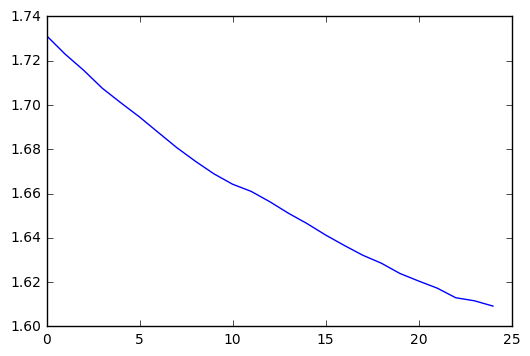

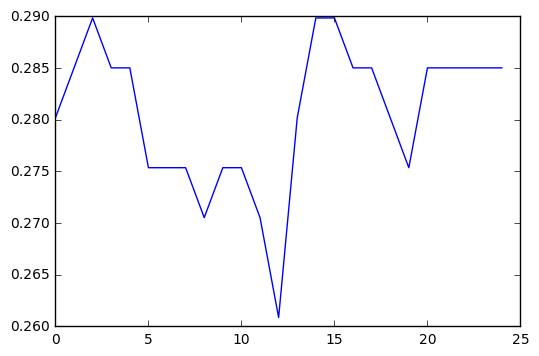

In [362]:
plt.plot(history.history["val_loss"])
plt.show()
plt.plot(history.history["val_accuracy"])
plt.show()